In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import LightSource, Normalize
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 18})

In [2]:
L = 30
n = 512
x2 = np.linspace(-L / 2, L / 2, n + 1)
x = x2[:n]  # Spatial discretization

k = n * (2 * np.pi / L) * np.fft.fftfreq(n)
V = np.power(x, 2)  # potential
t = np.arange(0, 20, .2)  # time domain collection points

In [3]:
def harm_rhs(ut_split, t, k=k, V=V, n=n):
    ut = ut_split[:n] + (1j) * ut_split[n:]
    u = np.fft.ifft(ut)
    rhs = -0.5 * (1j) * np.power(k, 2) * ut - 0.5 * (1j) * np.fft.fft(V * u)
    rhs_split = np.concatenate((np.real(rhs), np.imag(rhs)))
    return rhs_split

In [4]:
u = np.exp(-0.2 * np.power(x - 1, 2))  # initial conditions
ut = np.fft.fft(u)  # FFT initial data
ut_split = np.concatenate((np.real(ut), np.imag(ut)))

utsol_split = integrate.odeint(harm_rhs, ut_split, t, mxstep=10 ** 6)
utsol = utsol_split[:, :n] + (1j) * utsol_split[:, n:]

usol = np.zeros_like(utsol)
for jj in range(len(t)):
    usol[jj, :] = np.fft.ifft(utsol[jj, :])

In [5]:
u2 = np.exp(-0.2 * np.power(x - 0, 2))  # initial conditions
ut2 = np.fft.fft(u2)  # FFT initial data
ut2_split = np.concatenate((np.real(ut2), np.imag(ut2)))

ut2sol_split = integrate.odeint(harm_rhs, ut2_split, t, mxstep=10 ** 6)
ut2sol = ut2sol_split[:, :n] + (1j) * ut2sol_split[:, n:]

u2sol = np.zeros_like(ut2sol)
for jj in range(len(t)):
    u2sol[jj, :] = np.fft.ifft(ut2sol[jj, :])

/var/folders/sm/lw2bbffs15g5l3r4ldd25hc00000gn/T/ipykernel_24532/1442802606.py:1: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure())


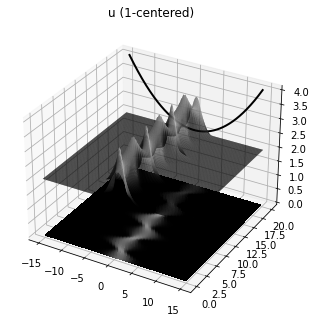

In [6]:
ax = Axes3D(plt.figure())
T, X = np.meshgrid(t, x)
light = LightSource(90, 45)
illuminated_surface = light.shade(np.abs(usol.T) + 2, cmap=cm.Greys_r)
ax.plot_surface(X, T, np.abs(usol.T) + 2, rstride=1, cstride=1, linewidth=0, antialiased=True,
                facecolors=illuminated_surface, vmin=0)

cmap = plt.cm.Greys_r
norm = Normalize(vmin=np.abs(usol).min(), vmax=np.abs(usol).max())
colors = cmap(norm(np.abs(usol.T)))
ax.plot_surface(X, T, np.zeros_like(X), rstride=1, cstride=1, linewidth=0, antialiased=False,
                facecolors=colors)

tv = np.zeros_like(x) + 20
Vx = np.power(x, 2)
ax.plot(x[11:-12], tv[11:-12], Vx[11:-12] / 100 + 2, 'k', linewidth=2)
ax.set_title('u (1-centered)')
plt.show()

/var/folders/sm/lw2bbffs15g5l3r4ldd25hc00000gn/T/ipykernel_24532/711461081.py:1: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure())


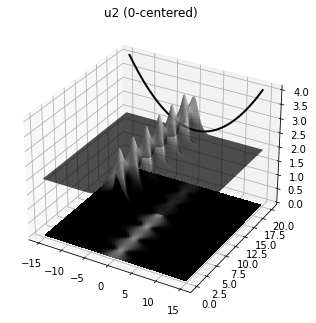

In [7]:
ax = Axes3D(plt.figure())
T, X = np.meshgrid(t, x)
light = LightSource(90, 45)
illuminated_surface = light.shade(np.abs(u2sol.T) + 2, cmap=cm.Greys_r)
ax.plot_surface(X, T, np.abs(u2sol.T) + 2, rstride=1, cstride=1, linewidth=0, antialiased=True,
                facecolors=illuminated_surface, vmin=0)

cmap = plt.cm.Greys_r
norm = Normalize(vmin=np.abs(u2sol).min(), vmax=np.abs(u2sol).max())
colors = cmap(norm(np.abs(u2sol.T)))
ax.plot_surface(X, T, np.zeros_like(X), rstride=1, cstride=1, linewidth=0, antialiased=False,
                facecolors=colors)

tv = np.zeros_like(x) + 20
Vx = np.power(x, 2)
ax.plot(x[11:-12], tv[11:-12], Vx[11:-12] / 100 + 2, 'k', linewidth=2)
ax.set_title('u2 (0-centered)')
plt.show()

In [8]:
usol3 = np.zeros_like(usol)
for jj in range(len(t)):
    usol3[jj, :] = usol[jj, np.flip(np.arange(n))]

usym = np.concatenate((usol, usol3))

U, S, VT = np.linalg.svd(usol.T)
U2, S2, VT2 = np.linalg.svd(u2sol.T)
U3, S3, VT3 = np.linalg.svd(usym.T)

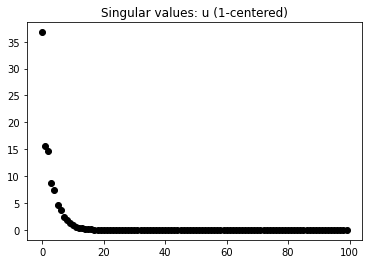

In [10]:
plt.plot(100 * S / np.sum(S), 'ko', linewidth=2)
plt.title('Singular values: u (1-centered)')
plt.show()

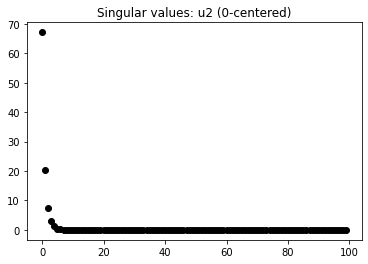

In [11]:
plt.plot(100 * S2 / np.sum(S2), 'ko', linewidth=2)
plt.title('Singular values: u2 (0-centered)')
plt.show()

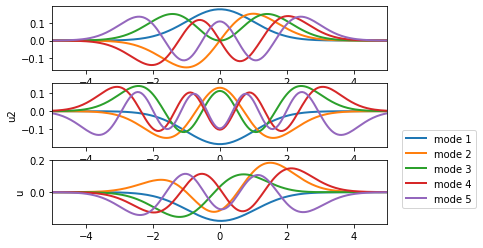

In [12]:
fig, axs = plt.subplots(3, 1)
Up = np.zeros((n, 5))
for jj in range(5):
    Up[:, jj] = np.real(U[:, jj] / np.linalg.norm(U[:, jj]))

[axs[2].plot(x, np.real(Up[:, k]), linewidth=2, label='mode {}'.format(k + 1)) for k in range(5)]

Up2 = np.zeros((n, 5))
for jj in range(5):
    Up2[:, jj] = np.real(U2[:, jj] / np.linalg.norm(U2[:, jj]))

[axs[1].plot(x, np.real(Up2[:, k]), linewidth=2) for k in range(5)]

h = np.array([np.ones_like(x), 2 * x, 4 * np.power(x, 2), 8 * np.power(x, 3) - 12 * x,
              16 * np.power(x, 4) - 48 * np.power(x, 2) + 12])

phi = np.zeros((n, 5))
phi2 = np.zeros((n, 5))

for jj in range(5):
    phi[:, jj] = (1 / (np.sqrt(np.math.factorial(jj) * (2 ** jj) * np.sqrt(np.pi))) *
                  np.exp(-np.power(x, 2) / 2) * h[jj, :])
    phi2[:, jj] = phi[:, jj] / np.linalg.norm(phi[:, jj])

[axs[0].plot(x, np.real(phi2[:, k]), linewidth=2) for k in range(5)]

for ax in axs:
    ax.set_xlim(-5, 5)

axs[1].set_ylabel('u2')
axs[2].set_ylabel('u')
axs[2].legend(bbox_to_anchor=(1.03, 1.55), loc="upper left")
plt.show()